<a href="https://colab.research.google.com/github/juliocasagrande/arinos/blob/main/BTC6_TPM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Importar dados CSV

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


###Pergunta 1 - Quantos clientes existem na base?

In [ ]:
num_clientes = df.shape[0]
print(num_clientes)

200


###Pergunta 2 - Vamos executar o k-means com os seguintes parâmetros: 3 clusters, inicialização aleatória de centróides, 300 iterações, inicialização com apenas uma escolha de centróides iniciais, e random_state  = 0. Quais clusters você obteve?

Centróides:
['48.10638298', '64.72340426', '31.05319149']
['32.69230769', '86.53846154', '82.12820513']
['29.44776119', '39.59701493', '58.47761194']


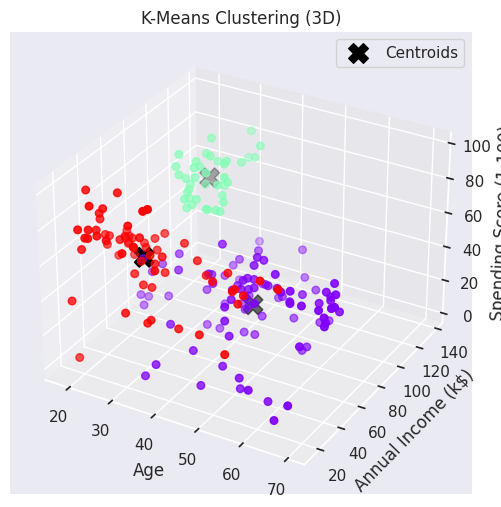

In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

kmeans = KMeans(
    n_clusters=3,
    init='random',
    max_iter=300,
    n_init=1,
    random_state=0
)

clusters = kmeans.fit_predict(X)

print("Centróides:")
for centroide in kmeans.cluster_centers_:
    print([f"{float(valor):.8f}" for valor in centroide])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    X['Age'],
    X['Annual Income (k$)'],
    X['Spending Score (1-100)'],
    c=clusters,
    cmap='rainbow',
    s=30
)

ax.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    kmeans.cluster_centers_[:, 2],
    c='black',
    marker='X',
    s=200,
    label='Centroids'
)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("K-Means Clustering (3D)")
ax.legend()
plt.show()

### Pergunta 3 - Uma das características do k-means é sua sensibilidade à escolha dos centroides iniciais. Dependendo dessa escolha, os clusters obtidos ao final do algoritmo podem ser diferentes. Para minimizar este efeito, você pode usar n_init para que o kmeans seja executado n_init vezes, começando, em cada momento, de centroides diferentes. Ao final, o agrupamento com menor inertia é escolhido. Vamos observar este comportamento na prática? Para os mesmos parâmetros da execução da questão anterior, execute 1000 vezes o kmeans, variando random_state de 0 a 999 (com for random_state in range(0, 1000):, por exemplo). Execute o algoritmo em dois cenários: número de inicializações 1 ou 20.  Compute quantos agrupamentos distintos são gerados, isto é, quantos valores distintos de kmeans.cluster_centers_ são gerados. Você pode usar np.unique(lista_de_centros, axis=0))) para computar o número de valores distintos na lista de agrupamentos que você vai manter. Ao aumentar o número de inicializações diferentes de 1 para 20, como se reduz o número de agrupamentos distintos obtidos?

In [ ]:
lista_de_centros = []
for random_state in range(0, 1000):
    kmeans = KMeans(
    n_clusters=3,
    init='random',
    max_iter=300,
    n_init=1,
    random_state=random_state
  )
    clusters = kmeans.fit_predict(X)
    lista_de_centros.append(kmeans.cluster_centers_)

centros_unicos = np.unique(lista_de_centros, axis=0)
num_centros_unicos = len(centros_unicos)
print("Número de centros únicos:", num_centros_unicos)

Número de centros únicos: 137


In [ ]:
lista_de_centros = []
for random_state in range(0, 1000):
    kmeans = KMeans(
    n_clusters=3,
    init='random',
    max_iter=300,
    n_init=20,
    random_state=random_state
  )
    clusters = kmeans.fit_predict(X)
    lista_de_centros.append(kmeans.cluster_centers_)

centros_unicos = np.unique(lista_de_centros, axis=0)
num_centros_unicos = len(centros_unicos)
print("Número de centros únicos:", num_centros_unicos)

Número de centros únicos: 6


###Pergunta 4 - Uma outra estratégia para tentar melhorar a convergência do k-means é escolher os centroides iniciais de forma mais inteligente. A estratégia de inicialização k-means++ (https://en.wikipedia.org/wiki/K-means%2B%2B) escolhe centróides iniciais que tendem a estar mais distantes um dos outros, aumentando a chance do algoritmo convergir mais rápido e encontrar clusters melhores. Usando os mesmos parâmetros da questão anterior, com n_init=1, vamos verificar se o número de agrupamentos distintos diminuiu se trocarmos a inicialização de random para k-means++. Qual a redução?

In [ ]:
lista_de_centros = []
for random_state in range(0, 1000):
    kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    max_iter=300,
    n_init=1,
    random_state=random_state
  )
    clusters = kmeans.fit_predict(X)
    lista_de_centros.append(kmeans.cluster_centers_)

centros_unicos = np.unique(lista_de_centros, axis=0)
num_centros_unicos = len(centros_unicos)
print("Número de centros únicos:", num_centros_unicos)

Número de centros únicos: 109


###Pergunta 5 - Ao partir de centroides iniciais que já estão mais distantes entre si (estratégia do k-means++), a chance de encontrarmos um agrupamento ruim diminui.  Mantendo os parâmetros da questão anterior e rodando sementes de 0 a 999, mantenha uma lista de todas as inertia obtidas (quanto menor, melhor o agrupamento). O pior agrupamento obtido cai de qual valor para qual valor, quando mudamos a inicialização de aleatória para k-means++?  Você pode usar np.max(inertias) para descobrir qual a pior (maior) inércia.

In [ ]:
lista_de_inertia = []
for random_state in range(0, 1000):
    kmeans = KMeans(
    n_clusters=3,
    init='random',
    max_iter=300,
    n_init=1,
    random_state=random_state
  )
    clusters = kmeans.fit_predict(X)
    lista_de_inertia.append(kmeans.inertia_)

pior_inercia = np.max(lista_de_inertia)
print("Pior inércia com random:", int(pior_inercia))

Pior inércia com random: 194733


In [ ]:
lista_de_inertia = []
for random_state in range(0, 1000):
    kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    max_iter=300,
    n_init=1,
    random_state=random_state
  )
    clusters = kmeans.fit_predict(X)
    lista_de_inertia.append(kmeans.inertia_)

pior_inercia = np.max(lista_de_inertia)
print("Pior inércia com k-means++:", int(pior_inercia))

Pior inércia com k-means++: 193325


###Pergunta 6 - Vamos agora descobrir o número ideal de clusters. Usando k-means++, 300 iterações, 10 inicializações distintas e random_state=0,  aplicando o método do cotovelo e computando a inércia, em quantos clusters você dividiria o conjunto?

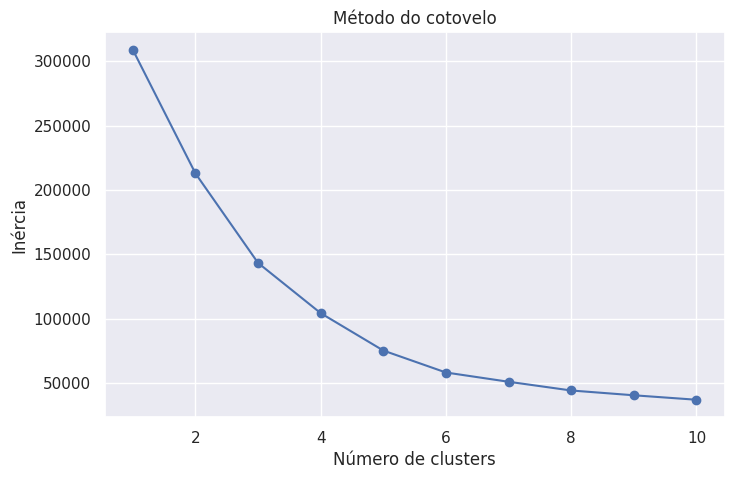

In [ ]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Método do cotovelo')
plt.show()

###Pergunta 7 - Caso você divida o conjunto com o k-means em 3 grupos, inicializando com k-means++, com 300 iterações, 10 inicializações e random_state=0, a qual grupo o primeiro registro (um homem de 19 anos) pertence?

In [ ]:
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=0
  )
clusters = kmeans.fit_predict(X)
X['Cluster'] = clusters
print("Cluster do primeiro registro:", X.loc[0, 'Cluster'])

Cluster do primeiro registro: 2


<ipython-input-11-6fa3a951c93c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = clusters


###Pergunta 8 - Executando o k-means com K=3, como você descreveria os clusters que você obteve, considerando, na ordem, o primeiro, segundo e terceiro cluster?  Use kmeans.cluster_centers_.

Centróides:
['44.15447154', '49.82926829']
['86.53846154', '82.12820513']
['87.00000000', '18.63157895']


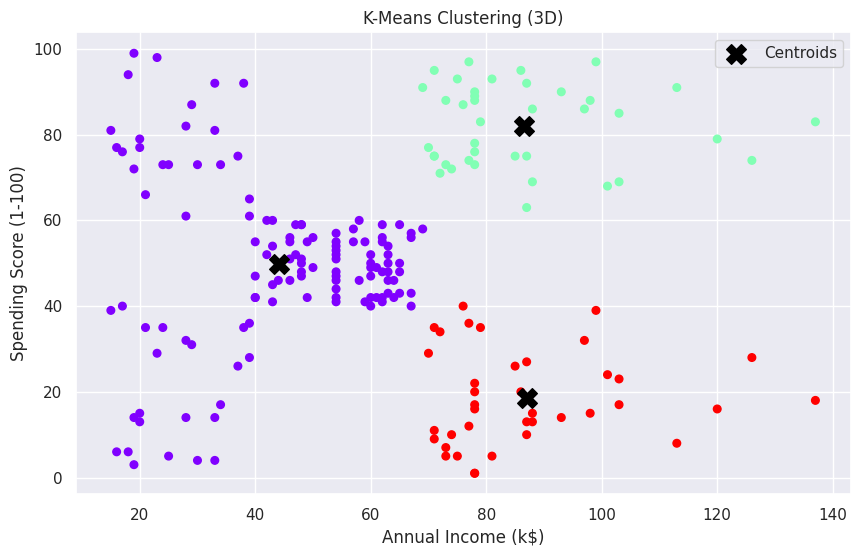

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=0
)

clusters = kmeans.fit_predict(X)

print("Centróides:")
for centroide in kmeans.cluster_centers_:
    print([f"{float(valor):.8f}" for valor in centroide])

plt.figure(figsize=(10, 6))
plt.scatter(
    X['Annual Income (k$)'],
    X['Spending Score (1-100)'],
    c=clusters,
    cmap='rainbow',
    s=30
)

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='black',
    marker='X',
    s=200,
    label='Centroids'
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering (3D)")
plt.legend()
plt.grid(True)
plt.show()

Resposta: Considerando os centróides, temos, de modo aproximado: [87, 18] - Renda mensal alta e score baixo; [86, 82] - renda mensal alta e score alto; [44, 50] - renda mensal baixa e score médio.

###Pergunta 9 - De acordo com o método da silhueta, qual o melhor número de clusters para o k-means?

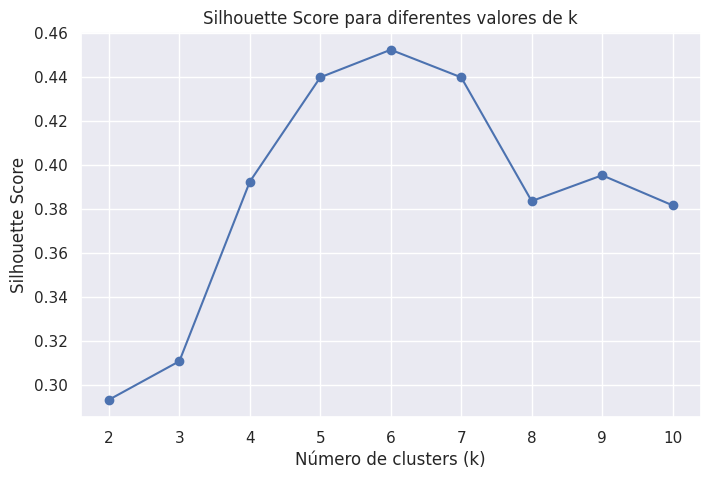

Melhor número de clusters pelo método da silhueta: 6


In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=1, max_iter=300, random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score para diferentes valores de k')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

melhor_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'Melhor número de clusters pelo método da silhueta: {melhor_k}')

###Pergunta 10 - Qual o melhor valor de silhueta encontrado?

In [ ]:
print(f'Melhor score da silhueta: {max(silhouette_scores)}')

Melhor score da silhueta: 0.4523443947724053


###Pergunta 11 -Todas são desvantagens do k-means, exceto:

*   (. ) Pontos extremos (anomalias) podem afetar significativamente os
clusters encontrados.
*   (X) É um algoritmo lento, que não escala para conjuntos de dados grandes.
*   (. ) Os clusters que o k-means encontra são sempre esféricos, ele têm
dificuldade em encontrar clusters de tamanhos e formas arbitrárias.
*   (. ) A escolha das sementes iniciais pode afetar o resultado do algoritmo e os clusters encontrados.

### Pergunta 12 - Vamos, agora, experimentar com o DBScan. Usando eps=15 e min_samples=2, quantos clusters são encontrados? Você pode usar np.unique(cluster_labels) para isso. Lembre-se que, no DBScan, os pontos que são outliers são marcados com -1.


<ipython-input-26-85f54fc461b6>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


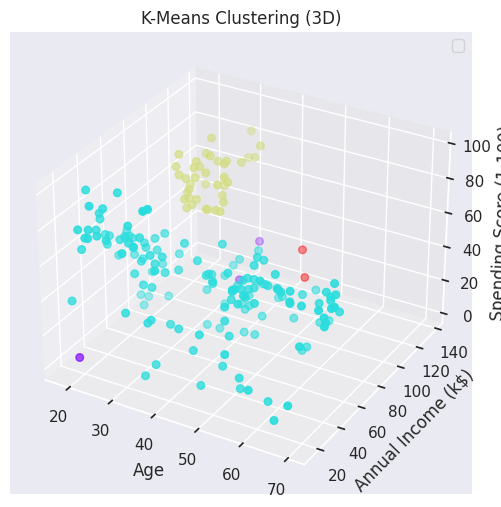

In [ ]:
dbscan = DBSCAN(eps=15, min_samples=2)
cluster_labels = dbscan.fit_predict(X)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    X['Age'],
    X['Annual Income (k$)'],
    X['Spending Score (1-100)'],
    c=cluster_labels,
    cmap='rainbow',
    s=30
)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("K-Means Clustering (3D)")
ax.legend()
plt.show()

In [ ]:
np.unique(cluster_labels)

array([-1,  0,  1,  2])

In [ ]:
num_clusters = len(np.unique(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f'Número de clusters: {num_clusters}')

Número de clusters: 3


###Pergunta 13 - No DBScan, o epslon é a distância máxima entre dois pontos para que eles pertençam à mesma vizinhança. Ou seja, quanto maior o epslon, maior a chance de dois pontos pertencerem ao mesmo grupo. A partir de que epslon, mantendo min_samples=2, o DBScan categoriza todos os clientes no mesmo grupo?

Epsilon quando apenas 1 cluster: 18.0



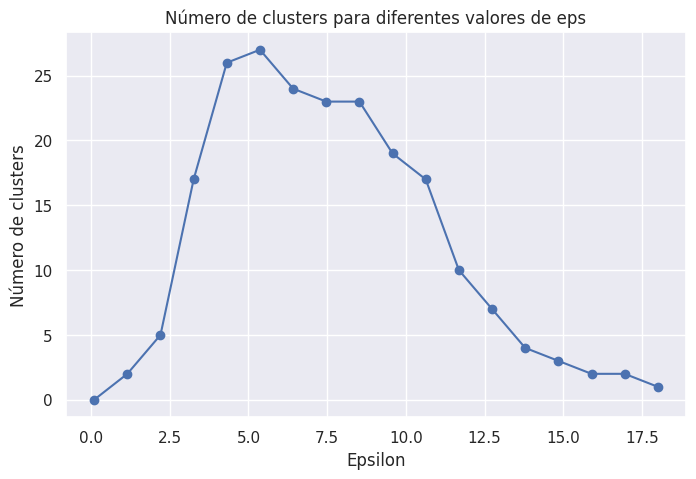

In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

eps_values = np.linspace(0.1, 18, 18)
n_clusters = []

for eps in eps_values:
    labels = DBSCAN(eps=eps, min_samples=2).fit_predict(X)
    n_clusters.append(len(np.unique(labels)) - (1 if -1 in labels else 0))
    if len(np.unique(labels)) - (1 if -1 in labels else 0) == 1:
        print(f'Epsilon quando apenas 1 cluster: {eps}\n')
        break

plt.figure(figsize=(8, 5))
plt.plot(eps_values, n_clusters, marker='o')
plt.title('Número de clusters para diferentes valores de eps')
plt.xlabel('Epsilon')
plt.ylabel('Número de clusters')
plt.grid(True)
plt.show()


###Pergunta 14 - Qual é uma característica importante do algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise)?

( ) Baseia-se no cálculo de distâncias euclidianas.

( ) É sensível à inicialização dos centroides.

( ) Requer a especificação do número de clusters a priori.

(X) Pode identificar clusters de diferentes formas e tamanhos.

### Pergunta 15 - min_samples é um parâmetro do DBScan que determina o número mínimo de pontos dentro de uma vizinhança para que ela seja considerada uma vizinhança que potencialmente vai fazer parte de um cluster. Quanto maior o número mínimo de pontos exigido, maior a chance deste ponto ser considerado um ponto isolado que não vai fazer parte de nenhum cluster. Com epslon=15, com qual número de pontos mínimo por vizinhança o DBScan classifica TODOS os pontos como outliers (indicado pelo rótulo do grupo-1)?

Min Sample quando todos os pontos são outliers: 34


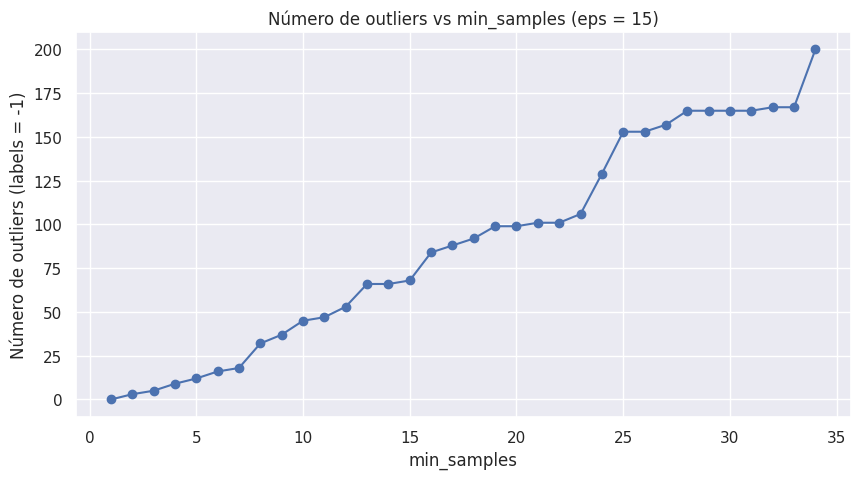

In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

min_samples_range = range(1, len(X)+1)
n_outliers_list = []
used_min_samples = []

for min_samples in min_samples_range:
    labels = DBSCAN(eps=15, min_samples=min_samples).fit_predict(X)
    n_outliers = np.sum(labels == -1)
    n_outliers_list.append(n_outliers)
    used_min_samples.append(min_samples)

    if n_outliers == total_points:
        print(f'Min Sample quando todos os pontos são outliers: {min_samples}')
        break

plt.figure(figsize=(10, 5))
plt.plot(used_min_samples, n_outliers_list, marker='o')
plt.title("Número de outliers vs min_samples (eps = 15)")
plt.xlabel("min_samples")
plt.ylabel("Número de outliers (labels = -1)")
plt.grid(True)
plt.show()